In [1]:
try:
    import SEM_Image as SI
    # import os
    # os.environ["OMP_NUM_THREADS"] = "14"  # Set the number of threads you want to use
    
except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade matplotlib tifffile

Select the .tif file that you want to analyse.

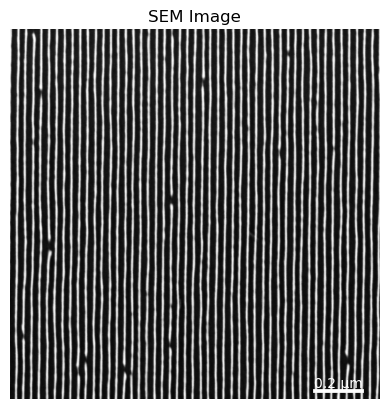

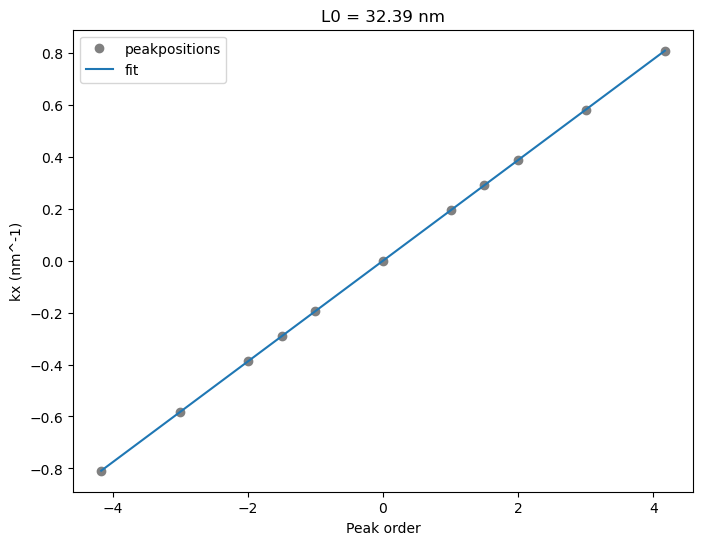

Average Rotation Angle: 0.49 Degrees


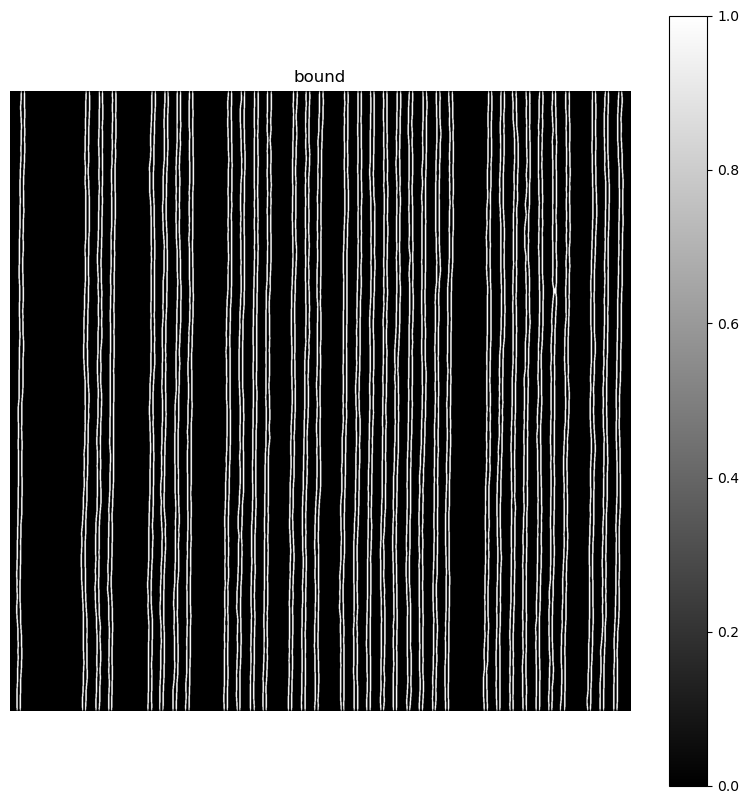

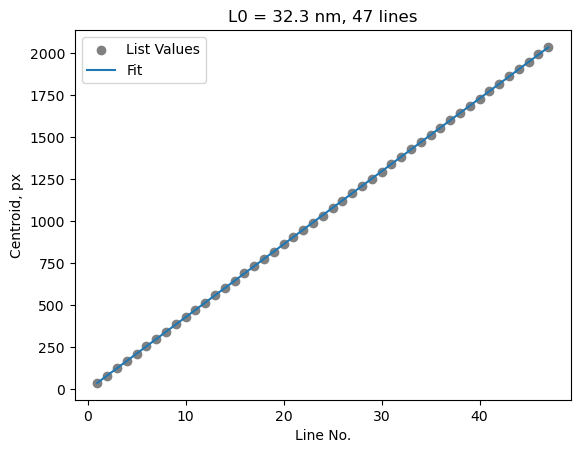

In [2]:
Image1 = SI.SEMImageDetails()  # Initializes all the variables for the object
Image1()  # This will run all the analysis

In [4]:
x = [len(coords) for coords in Image1.rotated_boundaries.values()]
print(x)

[2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060]
